# Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from CnnAlgoClass.AlexNet import AlexNet
from CnnAlgoClass.LoadData import LoadData
from CnnAlgoClass.Utils import imshow, modelTrain, modelAccurcy, saveModel, loadModel

# Data transformation

In [2]:
tf = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = LoadData(csv_file='Data\style\style.csv', root_dir='Data\style', transform = tf)

train_set, test_set = torch.utils.data.random_split(dataset, [1780, 404])

train_loader = DataLoader(dataset=train_set, batch_size=20, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=20, shuffle=True)

classes = ('shoes', 'lipstick', 'handbag', 'nail polish', 'necklace', 'watches', 'ring', 'bracelet', 'boots', 'earrings')

# Model training

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alex = AlexNet().to(device)

optimizer = torch.optim.SGD(alex.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [6]:
modelTrain(alex, train_loader, optimizer, criterion, epoch=10)

--- Training started ---
epoch: 1 loss: 2.2533
epoch: 2 loss: 2.1754
epoch: 3 loss: 2.1432
epoch: 4 loss: 2.0363
epoch: 5 loss: 1.9325
epoch: 6 loss: 1.8333
epoch: 7 loss: 1.7306
epoch: 8 loss: 1.6244
epoch: 9 loss: 1.5959
epoch: 10 loss: 1.5214
--- Finished Training ---


In [7]:
PATH = './models/AlexNet_SGD.pth'
saveModel(alex, PATH)

'Model saved successfully'

# Model Loading

In [8]:
alex = AlexNet()
PATH = './models/AlexNet_SGD.pth'
loadModel(alex, PATH)

'Model loaded successfully'

# Model Testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


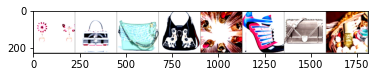

Vrai::  earrings handbag handbag handbag lipstick shoes handbag nail polish


In [12]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:8]))
print('Vrai:: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [13]:
outputs = alex(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))

Predicted:  earrings shoes handbag shoes shoes lipstick handbag lipstick


# Model accuracy

In [11]:
modelAccurcy(alex, test_loader, classes)

----- Accuracy for each class ----
- shoes : 80.00 %
- lipstick : 67.44 %
- handbag : 68.42 %
- nail polish : 0.00 %
- necklace : 70.37 %
- watches : 55.56 %
-  ring : 39.39 %
- bracelet : 4.17 %
- boots : 57.14 %
- earrings : 31.25 %
--------------------------------------------------
Accuracy of the network on the test images: 55.20 %
